In [1]:
%reload_ext autoreload
%autoreload 2

from hw4_base import *
import os

In [3]:
ins, outs, ins_val, outs_val = load_data_sets(directory_base, None)

##################
/home/fagg/datasets/core50/core50_128x128/s1/o15 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o12 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o13 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o14 .*[0].png
##################
/home/fagg/datasets/core50/core50_128x128/s1/o45 .*[0].png


/home/fagg/projects/archive/symbiotic2/classes/aml_2021/code/hw/hw4ahf/core50.py:27: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  image_2d = np.vstack(map(np.uint8, it[2]))


/home/fagg/datasets/core50/core50_128x128/s1/o42 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o43 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o44 .*[0].png
##################
/home/fagg/datasets/core50/core50_128x128/s1/o30 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o27 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o28 .*[0].png
/home/fagg/datasets/core50/core50_128x128/s1/o29 .*[0].png
##################
/home/fagg/datasets/core50/core50_128x128/s1/o11 .*[0].png
##################
/home/fagg/datasets/core50/core50_128x128/s1/o41 .*[0].png
##################
/home/fagg/datasets/core50/core50_128x128/s1/o41 .*[0].png


In [4]:
ins.shape

(359, 128, 128, 3)

In [5]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []

    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    return results

## Experiment 1

In [44]:
dirname = 'results/deep'
filebase = 'image_torque_hidden_50_20_Csize_3_5_5_5_Cfilters_10_12_14_16_Pool_2_2_2_2_drop_0.50_L2_0.002000_ntrain_02_rot_*_results.pkl'
results = read_all_rotations(dirname, filebase)

In [45]:
results[0]['history'].keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

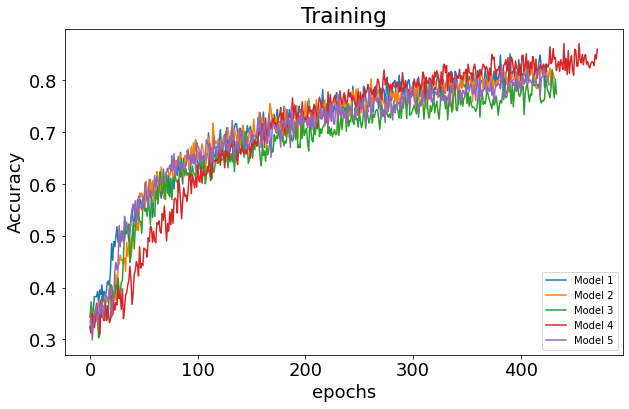

In [46]:
#Training Results
for i, r in enumerate(results):
    plt.plot(r['history']['categorical_accuracy'], label='Model {:d}'.format(i+1))
plt.title('Training')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right', prop={'size': 10})

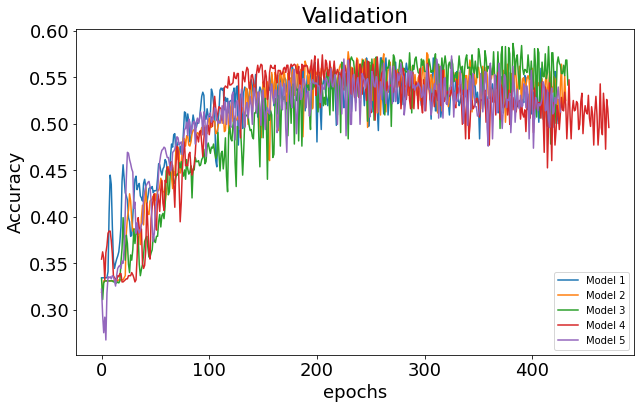

In [47]:
#Validation Results
for i, r in enumerate(results):
    plt.plot(r['history']['val_categorical_accuracy'], label='Model {:d}'.format(i+1))
plt.title('Validation')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right', prop={'size': 10})

In [41]:
results[0]['predict_training']
# not fully predicting .33 for each class, but not doing too well

array([[0.3323097 , 0.32471052, 0.34297973],
       [0.34159076, 0.39526564, 0.2631436 ],
       [0.35302263, 0.36956316, 0.2774142 ],
       ...,
       [0.35296467, 0.2883506 , 0.35868472],
       [0.3594405 , 0.30662322, 0.3339363 ],
       [0.35486338, 0.31099793, 0.3341387 ]], dtype=float32)

In [35]:
import heapq
deep_network_accuracy = 0
for r in results:
    deep_network_accuracy += np.average(heapq.nlargest(10, r['history']['val_categorical_accuracy']))
print (deep_network_accuracy / 5)

0.5720401406288147


## Experiment 2

In [36]:
filebase = 'image_torque_hidden_200_50_Csize_3_5_5_5_Cfilters_10_15_20_25_Pool_2_2_2_2_drop_0.50_L2_0.002000_ntrain_02_rot_*_results.pkl'
results = read_all_rotations(dirname, filebase)

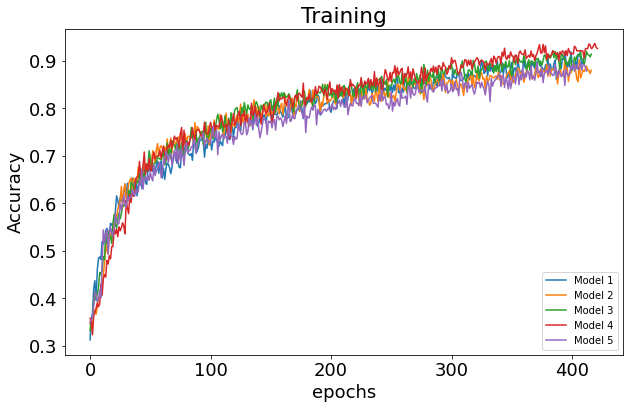

In [38]:
#Training Results
for i, r in enumerate(results):
    plt.plot(r['history']['categorical_accuracy'], label='Model {:d}'.format(i+1))
plt.title('Training')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right', prop={'size': 10})

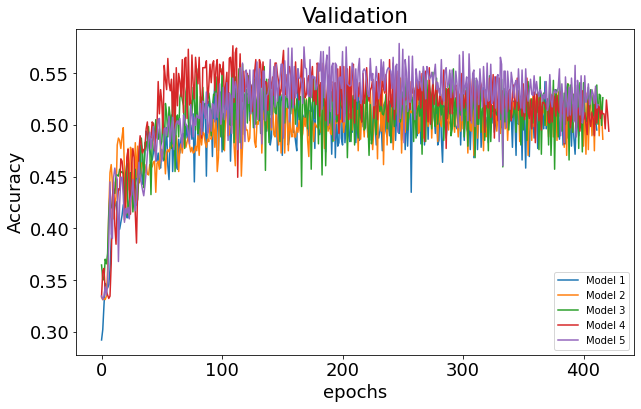

In [39]:
#Validation Results
for i, r in enumerate(results):
    plt.plot(r['history']['val_categorical_accuracy'], label='Model {:d}'.format(i+1))
plt.title('Validation')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right', prop={'size': 10})

In [40]:
import heapq
deep_network_accuracy = 0
for r in results:
    deep_network_accuracy += np.average(heapq.nlargest(10, r['history']['val_categorical_accuracy']))
print (deep_network_accuracy / 5)

0.5566332459449768


In [42]:
results[0]['predict_training']


array([[0.3323097 , 0.32471052, 0.34297973],
       [0.34159076, 0.39526564, 0.2631436 ],
       [0.35302263, 0.36956316, 0.2774142 ],
       ...,
       [0.35296467, 0.2883506 , 0.35868472],
       [0.3594405 , 0.30662322, 0.3339363 ],
       [0.35486338, 0.31099793, 0.3341387 ]], dtype=float32)

In [11]:
load_multiple_image_sets_from_directories()

NameError: name 'load_multiple_image_sets_from_directories' is not defined